<a href="https://colab.research.google.com/github/Allen123321/DEMO-DL/blob/master/LdaTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install lda

     |████████████████████████████████| 358kB 8.5MB/s 
     |████████████████████████████████| 102kB 8.8MB/s 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import lda.datasets
# 

In [3]:
X = lda.datasets.load_reuters()
print("type(X): {}".format(type(X)))
print("shape: {}\n".format(X.shape))
print(X[:10, :10])

type(X): <class 'numpy.ndarray'>
shape: (395, 4258)

[[ 1  0  1  0  0  0  1  0  0  1]
 [ 7  0  2  0  0  0  0  1  0  0]
 [ 0  0  0  1 10  0  4  1  1  0]
 [ 6  0  1  0  0  0  1  1  1  0]
 [ 0  0  0  2 14  1  1  0  2  1]
 [ 0  0  2  2 24  0  2  0  2  1]
 [ 0  0  0  2  7  1  1  0  1  0]
 [ 0  0  2  2 20  0  2  0  3  1]
 [ 0  1  0  2 17  2  2  0  0  0]
 [ 2  0  2  0  0  2  0  1  0  3]]


In [4]:

vocab = lda.datasets.load_reuters_vocab()
print("type(vocab): {}".format(type(vocab)))
print("len(vocab): {}\n".format(len(vocab)))
print(vocab[:10])

type(vocab): <class 'tuple'>
len(vocab): 4258

('church', 'pope', 'years', 'people', 'mother', 'last', 'told', 'first', 'world', 'year')


In [6]:
from pprint import pprint
# titles for each story
titles = lda.datasets.load_reuters_titles()
print("type(titles): {}".format(type(titles)))
print("len(titles): {}\n".format(len(titles)))
pprint(titles[:10])

type(titles): <class 'tuple'>
len(titles): 395

('0 UK: Prince Charles spearheads British royal revolution. LONDON 1996-08-20',
 '1 GERMANY: Historic Dresden church rising from WW2 ashes. DRESDEN, Germany '
 '1996-08-21',
 "2 INDIA: Mother Teresa's condition said still unstable. CALCUTTA 1996-08-23",
 '3 UK: Palace warns British weekly over Charles pictures. LONDON 1996-08-25',
 '4 INDIA: Mother Teresa, slightly stronger, blesses nuns. CALCUTTA 1996-08-25',
 "5 INDIA: Mother Teresa's condition unchanged, thousands pray. CALCUTTA "
 '1996-08-25',
 '6 INDIA: Mother Teresa shows signs of strength, blesses nuns. CALCUTTA '
 '1996-08-26',
 "7 INDIA: Mother Teresa's condition improves, many pray. CALCUTTA, India "
 '1996-08-25',
 '8 INDIA: Mother Teresa improves, nuns pray for "miracle". CALCUTTA '
 '1996-08-26',
 '9 UK: Charles under fire over prospect of Queen Camilla. LONDON 1996-08-26')


In [7]:
#下面是测试文档编号为0，单词编号为3117的数据，X[0,3117]：
doc_id = 0
word_id = 3117
print("doc id: {} word id: {}".format(doc_id, word_id))
print("-- count: {}".format(X[doc_id, word_id]))
print("-- word : {}".format(vocab[word_id]))
print("-- doc  : {}".format(titles[doc_id]))

doc id: 0 word id: 3117
-- count: 2
-- word : heir-to-the-throne
-- doc  : 0 UK: Prince Charles spearheads British royal revolution. LONDON 1996-08-20


In [8]:
topic_num = 20
model = lda.LDA(n_topics=topic_num, n_iter=500, random_state=1)
model.fit(X)

INFO:lda:n_documents: 395
INFO:lda:vocab_size: 4258
INFO:lda:n_words: 84010
INFO:lda:n_topics: 20
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -1051748
INFO:lda:<10> log likelihood: -719800
INFO:lda:<20> log likelihood: -699115
INFO:lda:<30> log likelihood: -689370
INFO:lda:<40> log likelihood: -684918
INFO:lda:<50> log likelihood: -681322
INFO:lda:<60> log likelihood: -678979
INFO:lda:<70> log likelihood: -676598
INFO:lda:<80> log likelihood: -675383
INFO:lda:<90> log likelihood: -673316
INFO:lda:<100> log likelihood: -672761
INFO:lda:<110> log likelihood: -671320
INFO:lda:<120> log likelihood: -669744
INFO:lda:<130> log likelihood: -669292
INFO:lda:<140> log likelihood: -667940
INFO:lda:<150> log likelihood: -668038
INFO:lda:<160> log likelihood: -667429
INFO:lda:<170> log likelihood: -666475
INFO:lda:<180> log likelihood: -665562
INFO:lda:<190> log likelihood: -664920
INFO:lda:<200> log likelihood: -664979
INFO:lda:<210> log likelihood: -664722
INFO:lda:<220> log likelihood: -6

In [9]:
topic_word = model.topic_word_
print("type(topic_word): {}".format(type(topic_word)))
print("shape: {}".format(topic_word.shape))
print(vocab[:5])
print(topic_word[:, :5])

type(topic_word): <class 'numpy.ndarray'>
shape: (20, 4258)
('church', 'pope', 'years', 'people', 'mother')
[[2.72436509e-06 2.72436509e-06 2.72708945e-03 2.72436509e-06
  2.72436509e-06]
 [2.29518860e-02 1.08771556e-06 7.83263973e-03 1.15308726e-02
  1.08771556e-06]
 [3.97404221e-03 4.96135108e-06 2.98177200e-03 4.96135108e-06
  4.96135108e-06]
 [3.27374625e-03 2.72585033e-06 2.72585033e-06 2.45599115e-03
  2.72585033e-06]
 [8.26262882e-03 8.56893407e-02 1.61980569e-06 4.87561512e-04
  1.61980569e-06]
 [1.30107788e-02 2.95632328e-06 2.95632328e-06 2.95632328e-06
  2.95632328e-06]
 [2.80145003e-06 2.80145003e-06 2.80145003e-06 2.80145003e-06
  2.80145003e-06]
 [2.42858077e-02 4.66944966e-06 4.66944966e-06 4.66944966e-06
  2.42858077e-02]
 [6.84655429e-03 1.90129250e-06 6.84655429e-03 1.90129250e-06
  1.90129250e-06]
 [3.48361655e-06 3.48361655e-06 3.48361655e-06 3.48361655e-06
  3.48361655e-06]
 [2.98781661e-03 3.31611166e-06 3.31611166e-06 8.29359526e-03
  3.31611166e-06]
 [4.27062069

In [10]:
for n in range(5):
    sum_pr = sum(topic_word[n, :])
    print("topic: {} sum: {}".format(n, sum_pr))

topic: 0 sum: 1.0000000000000875
topic: 1 sum: 1.0000000000001148
topic: 2 sum: 0.9999999999998656
topic: 3 sum: 1.0000000000000042
topic: 4 sum: 1.0000000000000928


In [11]:
#每个主题中的前7个单词

n = 7
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n + 1):-1]
    print('*Topic {}\n- {}'.format(i, ' '.join(topic_words)))

*Topic 0
- government british minister west group letters party
*Topic 1
- church first during people political country ceremony
*Topic 2
- elvis king wright fans presley concert life
*Topic 3
- yeltsin russian russia president kremlin michael romania
*Topic 4
- pope vatican paul surgery pontiff john hospital
*Topic 5
- family police miami versace cunanan funeral home
*Topic 6
- south simpson born york white north african
*Topic 7
- order church mother successor since election religious
*Topic 8
- charles prince diana royal queen king parker
*Topic 9
- film france french against actor paris bardot
*Topic 10
- germany german war nazi christian letter book
*Topic 11
- east prize peace timor quebec belo indonesia
*Topic 12
- n't told life people church show very
*Topic 13
- years world time year last say three
*Topic 14
- mother teresa heart charity calcutta missionaries sister
*Topic 15
- city salonika exhibition buddhist byzantine vietnam swiss
*Topic 16
- music first people tour includ

In [12]:
###计算输入前10篇文字最可能的topic
doc_topic = model.doc_topic_
print("type(doc_topic): {}".format(type(doc_topic)))
print("shape: {}".format(doc_topic.shape))
for i in range(10):
    topic_most_pr = doc_topic[i].argmax()
    print(u"文档: {} 主题: {} value: {}".format(i, topic_most_pr, doc_topic[i][topic_most_pr]))

mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

type(doc_topic): <class 'numpy.ndarray'>
shape: (395, 20)
文档: 0 主题: 8 value: 0.4830434782608696
文档: 1 主题: 1 value: 0.29057971014492756
文档: 2 主题: 14 value: 0.6656903765690377
文档: 3 主题: 8 value: 0.5076555023923446
文档: 4 主题: 14 value: 0.7789667896678965
文档: 5 主题: 14 value: 0.844097222222222
文档: 6 主题: 14 value: 0.8035353535353537
文档: 7 主题: 14 value: 0.877474402730375
文档: 8 主题: 14 value: 0.8196153846153844
文档: 9 主题: 8 value: 0.5342105263157892


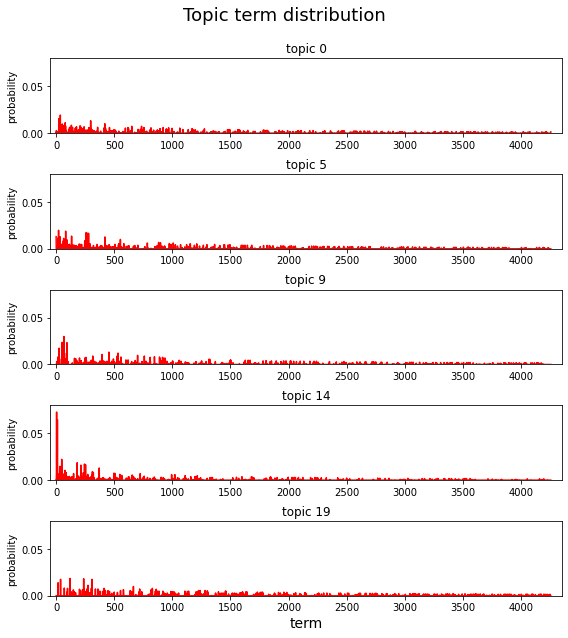

In [14]:
#计算每个主题中单词权重分布情况：
plt.figure(figsize=(8, 9))
# f, ax = plt.subplots(5, 1, sharex=True)
for i, k in enumerate([0, 5, 9, 14, 19]):
    ax = plt.subplot(5, 1, i+1)
    ax.plot(topic_word[k, :], 'r-')
    ax.set_xlim(-50, 4350)   # [0,4258]
    ax.set_ylim(0, 0.08)
    ax.set_ylabel(u"probability")
    ax.set_title(u"topic {}".format(k))
plt.xlabel(u"term", fontsize=14)
plt.tight_layout()
plt.suptitle(u'Topic term distribution', fontsize=18)
plt.subplots_adjust(top=0.9)
plt.show()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this

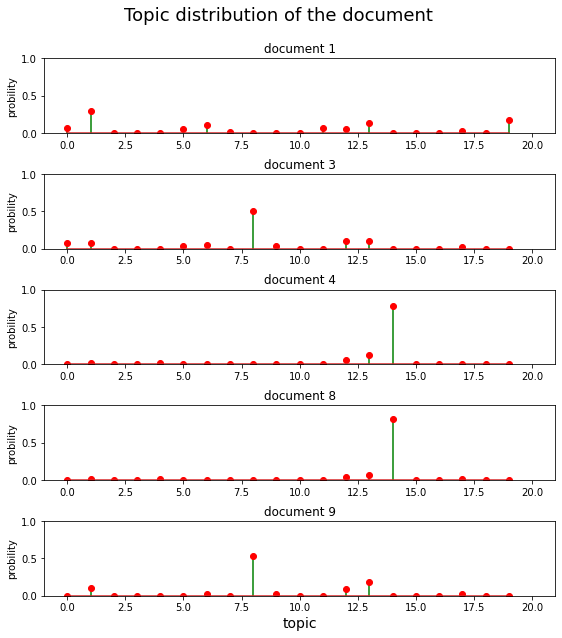

In [15]:
# Document - Topic
plt.figure(figsize=(8, 9))
for i, k in enumerate([1, 3, 4, 8, 9]):
    ax = plt.subplot(5, 1, i+1)
    ax.stem(doc_topic[k, :], linefmt='g-', markerfmt='ro')
    ax.set_xlim(-1, topic_num+1)
    ax.set_ylim(0, 1)
    ax.set_ylabel(u"probility")
    ax.set_title(u"document {}".format(k))
plt.xlabel(u"topic", fontsize=14)
plt.suptitle(u'Topic distribution of the document', fontsize=18)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()